In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

# Import libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


# **importing dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/athlete_events.csv')
noc = pd.read_csv('/content/drive/MyDrive/dataset/noc_regions.csv')
print(f'The athlete data has {df.shape[0]:,} rows and {df.shape[1]} columns')
print(f'The NOC data has {noc.shape[0]:,} rows and {noc.shape[1]} columns')

The athlete data has 271,116 rows and 15 columns
The NOC data has 230 rows and 3 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
noc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


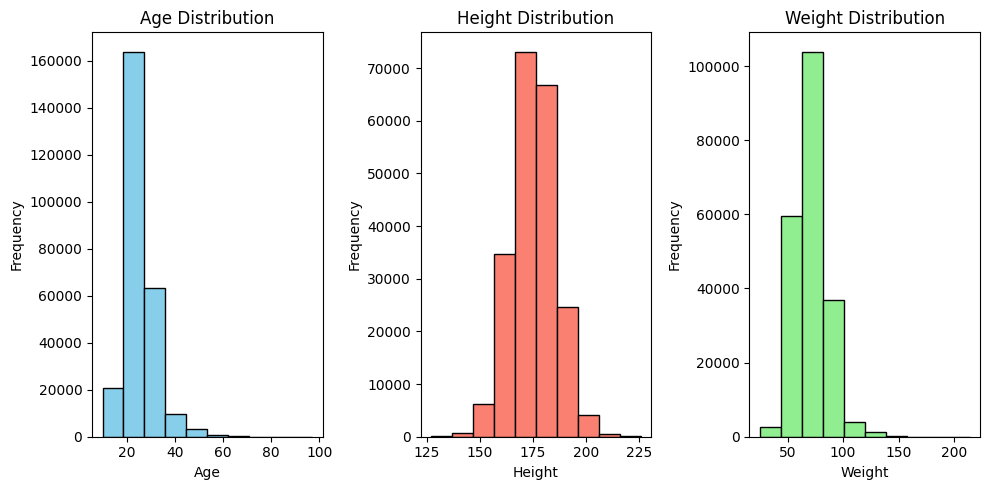

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Plot Age Distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot Height Distribution
plt.subplot(1, 3, 2)
plt.hist(df['Height'], bins=10, color='salmon', edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

# Plot Weight Distribution
plt.subplot(1, 3, 3)
plt.hist(df['Weight'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Get the number of unique values in each column
unique_counts = df.nunique()

# Display the results
print("Number of Unique Values in Each Column:")
print(unique_counts)

Number of Unique Values in Each Column:
ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
region       205
dtype: int64


In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# **Merging two files**

In [ ]:
noc.drop('notes', axis=1, inplace=True)
df = df.merge(right=noc, on='NOC', how='left')
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region'],
      dtype='object')

In [ ]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 35.2+ MB


# **null values**

In [ ]:
# Check for Nulls / Missing data
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
dtype: int64

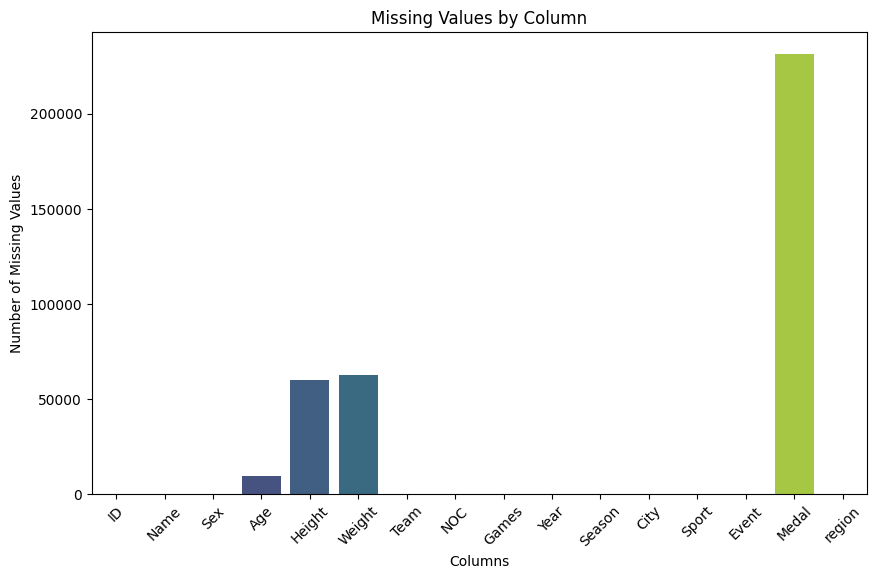

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot to visualize missing values in each column
missing_values = df.isna().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

# **duplicates**

In [ ]:
# Check for Duplicates
dupe = df[df.duplicated()]
print(f'There are {dupe.shape[0]:,} duplicates in the data but they are not actual duplicates.Some athlete participated in both individual and Team event')
dupe
#df.drop_duplicates(keep='first', inplace=True)

There are 1,385 duplicates in the data but they are not actual duplicates.Some athlete participated in both individual and Team event


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,Belgium
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN,Germany
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN,UK
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN,UK
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK


# **outliers**

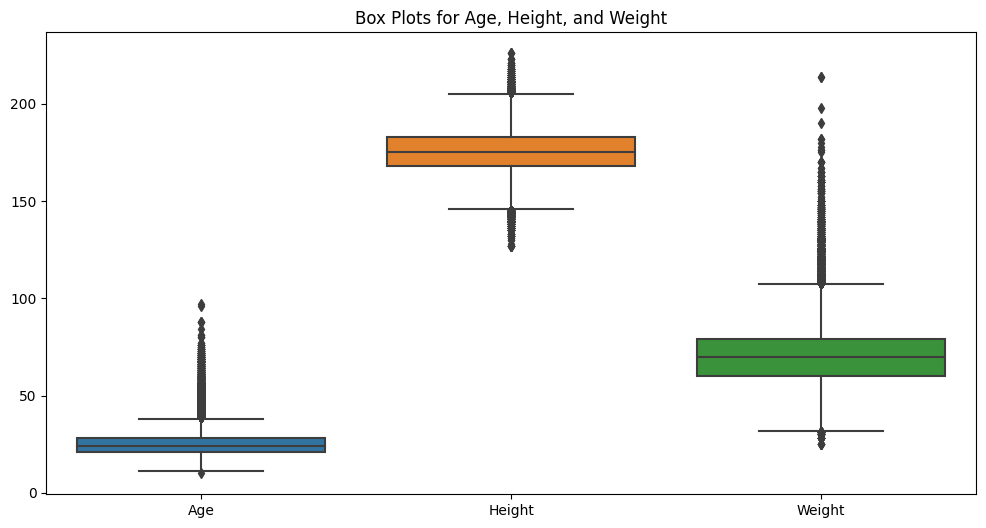

In [ ]:
# Create box plots for numeric columns with potential outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numeric columns
numeric_columns = df[['Age', 'Height', 'Weight']]

# Create box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_columns)
plt.title("Box Plots for Age, Height, and Weight")
plt.show()



# **consistency**

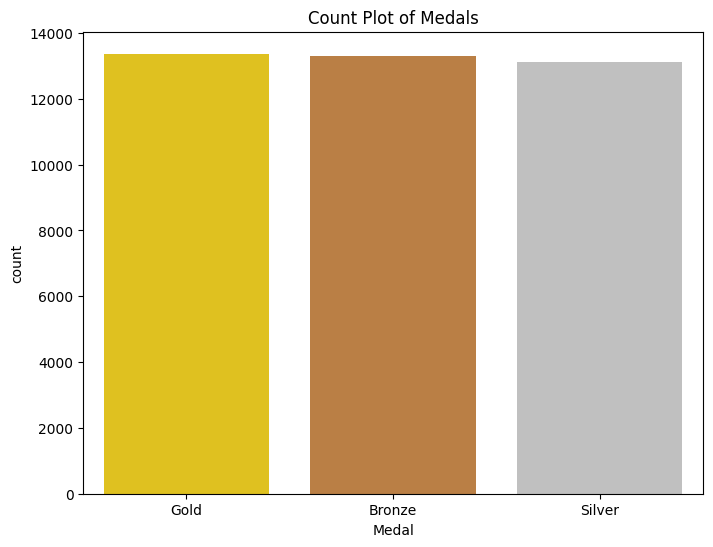

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette for gold, silver, and bronze
custom_palette = {"Gold": "gold", "Silver": "silver", "Bronze": "#cd7f32"}

# Create a count plot for the 'Medal' column with the custom palette
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Medal', order=df['Medal'].value_counts().index, palette=custom_palette)
plt.title("Count Plot of Medals")
plt.show()

In [ ]:
# Check the balance of the 'Medal' column
medal_counts = df['Medal'].value_counts()

# Calculate the class imbalance
class_imbalance = medal_counts / len(df) * 100

print(medal_counts)
print(class_imbalance)

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64
Gold      4.932206
Bronze    4.903805
Silver    4.837782
Name: Medal, dtype: float64


The class distribution is quite even, with no single class dominating the others. The class percentages are also quite close, with each class representing approximately 4.85% to 4.96% of the total dataset. When there is no significant imbalance in the class distribution, the dataset is considered balanced for classification task.

In [ ]:
#How many unique Regions are there in the dataset?

df['region'].unique().shape

(206,)

In [ ]:
 #In each category, how many medals did the winners win?

df['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [ ]:
#In which years were the Olympic Games organized?

years = df['Year'].unique().tolist()
years.sort()
years.insert(0, 'Overall')
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1994,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016]

In [ ]:
#Which countries participated in the Olympic games to date?

country = np.unique(df['region'].dropna().values).tolist()
country.sort()
country.insert(0,'Overall')
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [ ]:
#Over the years how many participating nations are attented Olympics?

nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('Year')
nations_over_time.rename(columns={'Year':'Edition', 'count':'No of Countries'}, inplace=True)
nations_over_time

,index,Edition
34,1896,12
33,1904,14
32,1906,20
31,1908,22
30,1920,29
29,1912,29
28,1900,31
27,1928,46
26,1924,46
25,1932,47


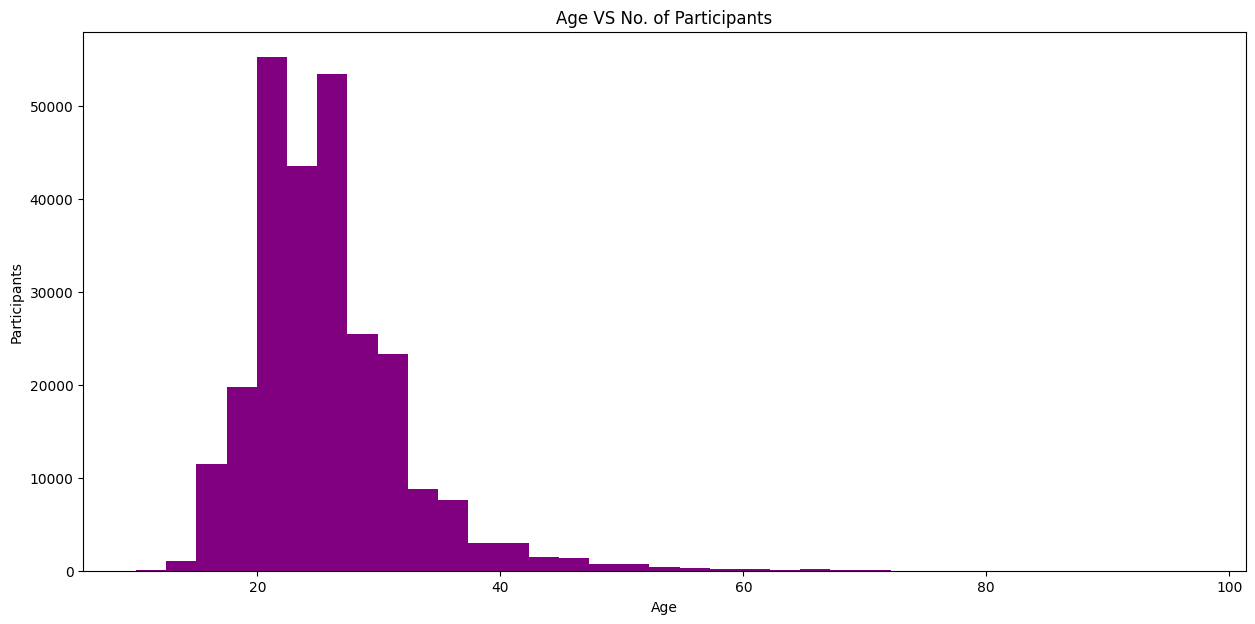

In [ ]:
# Age Distribution

plt.figure(figsize=(15,7))
plt.title("Age VS No. of Participants")
plt.hist(df.Age,color='purple', bins = 35)
plt.xlabel("Age")
plt.ylabel("Participants")
plt.show()

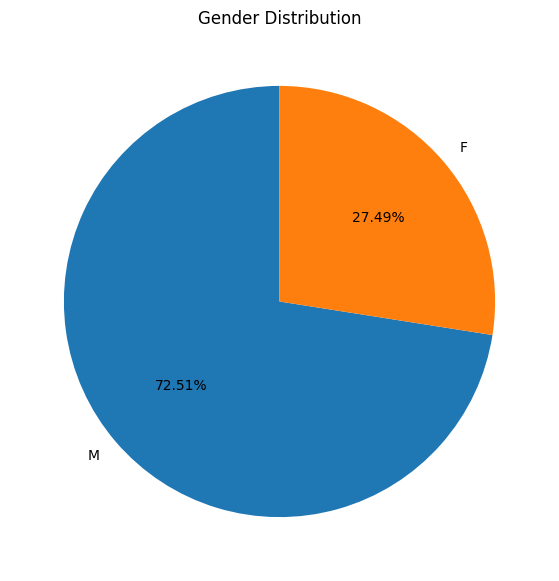

In [ ]:
# Gender Distribution
gender_unique_values = df.Sex.value_counts()
gender_unique_values


plt.figure(figsize=(15,7))
plt.title("Gender Distribution")
plt.pie(gender_unique_values, labels=gender_unique_values.index, autopct="%.2f%%", startangle=90)
plt.show()

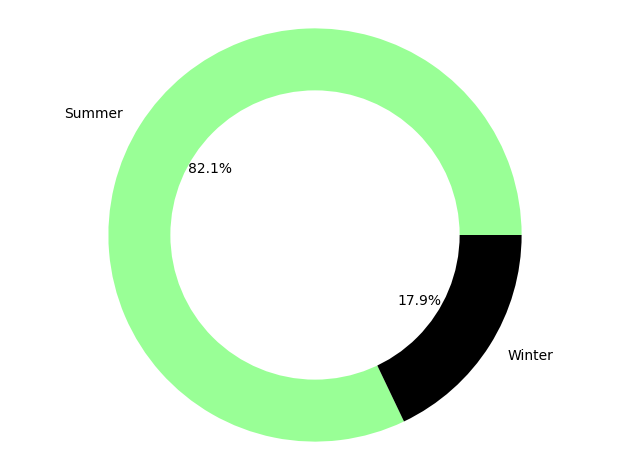

In [ ]:
# Participants across the season

seasons = df.Season.value_counts()
seasons


# Visualizing paritipant distribution in different season
fig1, ax1 = plt.subplots()

colors = ['#99ff96','#000000']

ax1.pie(seasons, colors = colors, labels=seasons.index, autopct='%1.1f%%')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
# Top 15 Countries participating in Olympics by no. of participants
top_countries = df.Team.value_counts().sort_values(ascending=False).head(15)
top_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Poland            6143
Switzerland       5844
Netherlands       5718
Soviet Union      5535
Finland           5379
Name: Team, dtype: int64

<Axes: title={'center': 'Top 15 Countries Total Participations'}, ylabel='Team'>

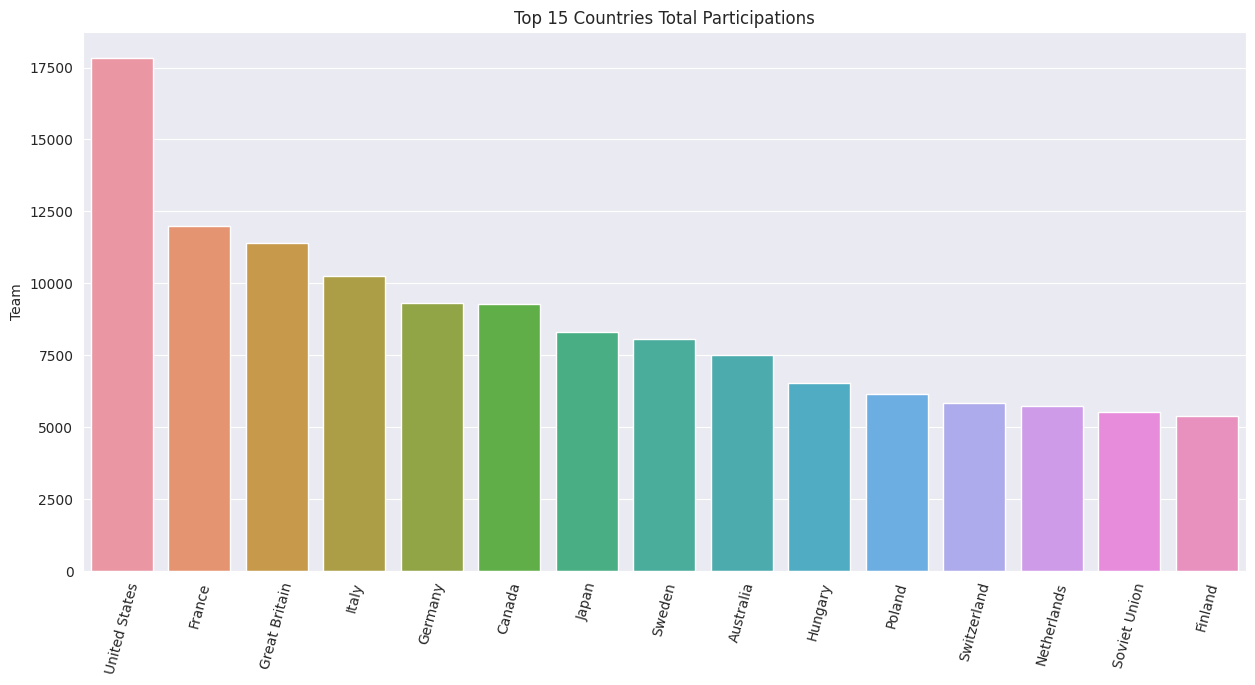

In [ ]:
# Data Visualization of countries participating
sns.set_style('darkgrid')
plt.figure(figsize=(15, 7))
plt.title('Top 15 Countries Total Participations')
plt.xticks(rotation=75)
sns.barplot(x=top_countries.index, y=top_countries)


In [ ]:
# Data of countries with most Gold medals

max_year_country = df[(df.Medal == 'Gold')].Team
max_year_country = max_year_country.value_counts().head(20)
max_year_country

United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
France            455
Sweden            451
Hungary           432
Canada            422
East Germany      369
Russia            366
Australia         342
China             308
Norway            299
Netherlands       277
Japan             247
South Korea       211
Finland           198
Denmark           168
Cuba              164
Name: Team, dtype: int64

In [ ]:
# Age vs Height Spread

age_heig = df[(df.Age != 0) & (df.Height != 0.0) & (df.Medal != 'None') & (df.Season == 'Summer')]
plt.figure(figsize=(15,7))
sns.scatterplot(x=age_heig.Age, y=age_heig.Height, data=age_heig, hue='Sex')
plt.xlabel('Age')
plt.ylabel('Height')

Text(0, 0.5, 'Height')

In [ ]:
# Age vs Weight Spread

age_weig = df[(df.Age != 0.0) & (df.Weight != 0.0) & (df.Medal != 'None') & (df.Season == 'Summer')]
plt.figure(figsize=(15,7))
sns.scatterplot(x=age_weig.Age, y=age_weig.Weight, data=age_weig, hue='Sex')
plt.xlabel('Age')
plt.ylabel('Weight')

the scatter plot suggests that there is a positive correlation between age and weight in athletes. This means that older athletes tend to be heavier, but there is a lot of variation in the data.

In [ ]:
# Weight & Height Spread

heig_weight = df[(df.Height != 0.0) & (df.Age != 0) & (df.Weight != 0.0) & (df.Medal != 'None') & (df.Season == 'Summer')]
plt.figure(figsize=(15,7))
sns.scatterplot(x=heig_weight.Weight, y=heig_weight.Height, data=heig_weight, hue='Sex')
plt.xlabel('Weight')
plt.ylabel('Height')

The scatter plot shows the relationship between the weight and height of a group of people. There is a positive correlation between weight and height. This means that taller people tend to be heavier, but there is a lot of variation in the data.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numeric columns
numeric_columns = df[['Age', 'Height', 'Weight']]

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]

# Remove outliers for each column
numeric_columns_cleaned = numeric_columns.copy()
for column_name in numeric_columns.columns:
    numeric_columns_cleaned = remove_outliers_iqr(numeric_columns_cleaned, column_name)

# Create box plots for the cleaned data
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_columns_cleaned)
plt.title("Box Plots for Age, Height, and Weight (Outliers Removed)")
plt.show()


# **droping duplicates**

In [ ]:
df.drop_duplicates(keep='first', inplace=True)

# **EDA on name**

In [ ]:
df['City'].unique()
# Turin not Torino

df['City'] = df['City'].replace('Torino', 'Turin')
# df[df['City'] == 'Torino'] = 'Turin'  -- Dont use

df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Turin', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

# **New section**

# **fixing nulls**

In [ ]:
# Droping records with Age, height, weight and Medal is Null
alnull = df[df['Age'].isna() & df['Height'].isna() & df['Weight'].isna() & df['Medal'].isna()]
df = df[~df.index.isin(alnull.index)]
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland


Replace Nulls using Scikit Learn Simple Imputer

In [ ]:
# get the categorical and numeric column names
obj_col = list(df.select_dtypes(include='object').columns)
num_col = list(df.select_dtypes(exclude=['object']).columns)
print(f'The object columns are: {obj_col} \nThe numeric columns are: {num_col}')

# Get the dataframe of the numeric and objects
df_obj = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')

The object columns are: ['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region'] 
The numeric columns are: ['ID', 'Age', 'Height', 'Weight', 'Year']


In [ ]:

# Simple Imputer for the Numeric
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df_num)

# Prepare the numerica Data
nums = pd.DataFrame(data = imp_mean.transform(df_num), columns=num_col)

# Simple Imputer for the category
imp_miss = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='None')
imp_miss.fit(df_obj)

# prepare the category data
obj = pd.DataFrame(data = imp_miss.transform(df_obj), columns=obj_col)

data = nums.join(obj)

# Converting numeric columns to Integer
data['ID'] = data['ID'].astype('int64')
data['Age'] = data['Age'].astype('int64')
data['Height'] = data['Height'].astype('int64')
data['Weight'] = data['Weight'].astype('int64')
data['Year'] = data['Year'].astype('int64')

# Arranging the columns
data = data[['ID', 'Name', 'Age', 'Sex', 'Height', 'Weight', 'Year', 'Team', 'NOC', 'region',
       'Games', 'Season', 'City', 'Sport', 'Event', 'Medal']]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262156 entries, 0 to 262155
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      262156 non-null  int64 
 1   Name    262156 non-null  object
 2   Age     262156 non-null  int64 
 3   Sex     262156 non-null  object
 4   Height  262156 non-null  int64 
 5   Weight  262156 non-null  int64 
 6   Year    262156 non-null  int64 
 7   Team    262156 non-null  object
 8   NOC     262156 non-null  object
 9   region  262156 non-null  object
 10  Games   262156 non-null  object
 11  Season  262156 non-null  object
 12  City    262156 non-null  object
 13  Sport   262156 non-null  object
 14  Event   262156 non-null  object
 15  Medal   262156 non-null  object
dtypes: int64(5), object(11)
memory usage: 32.0+ MB


# **Exporting the clean data**

In [ ]:
data.to_csv('/content/drive/MyDrive/dataset/clean_athlete.csv', index=False)